In [ ]:
import torch
device=torch.device(0)
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')
model.conf = 0.5
#model.to(device) 
# Image
img = 'test.jpg'

# Inference
results = model(img)
results.print()
results.pandas().xyxy[0]
results.show()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-14 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 1 tie
Speed: 19.8ms pre-process, 2250.5ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
import cv

In [ ]:
results = model(img)

results.pandas().xyxy[0]


,xmin,ymin,xmax,ymax,confidence,class,name
0,746.699097,41.938354,1145.124146,710.435425,0.943767,0,person
1,116.114075,199.385376,1066.704346,711.959290,0.918710,0,person
2,433.970612,434.957642,524.817871,717.941650,0.882575,27,tie


In [ ]:
results.save()

Saved 1 image to runs/detect/exp3


In [ ]:
crops = results.crop()

Saved 1 image to runs/detect/exp4
Saved results to runs/detect/exp4



In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline
crops

[{'box': [tensor(433.97061),
   tensor(434.95764),
   tensor(524.81787),
   tensor(717.94165)],
  'cls': tensor(27.),
  'conf': tensor(0.88257),
  'im': array([[[  2,   3,   1],
          [  2,   3,   1],
          [  3,   4,   2],
          ...,
          [134, 219,  61],
          [134, 219,  61],
          [134, 219,  61]],
  
         [[  2,   3,   1],
          [  3,   4,   2],
          [  3,   4,   2],
          ...,
          [134, 219,  61],
          [134, 219,  61],
          [134, 219,  61]],
  
         [[  2,   3,   1],
          [  3,   4,   2],
          [  3,   4,   2],
          ...,
          [134, 219,  61],
          [134, 219,  61],
          [134, 219,  61]],
  
         ...,
  
         [[ 55,  68,  52],
          [ 56,  72,  55],
          [ 60,  85,  52],
          ...,
          [ 19,  30,   8],
          [  0,   1,   1],
          [  1,   1,   1]],
  
         [[ 61,  74,  58],
          [ 61,  77,  60],
          [ 53,  74,  55],
          ...,
          [ 

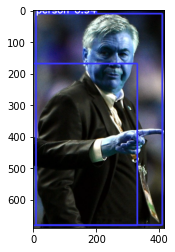

In [ ]:
imshow(crops[2]['im'])

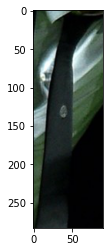

In [ ]:
from PIL import Image
im = Image.open(img)
x1, y1, x2, y2 = results.xyxy[0][2][0], results.xyxy[0][2][1], results.xyxy[0][2][2], results.xyxy[0][2][3]
crop1 =  im.crop((int(x1), int(y1), int(x2), int(y2)))
imshow(crop1)